# BT4012 Fraud Analytics Project

In [38]:
# !pip install folium

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import folium as fo
from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy import stats


https://www.kaggle.com/code/badmangamingsv/credit-card-fraud-detection/notebook

^ Can reference from this and take this out before submission

## Importing Data

In [2]:
# Import the training dataset
train = pd.read_csv("fraudTrain.csv", index_col=0)

# Import the testing dataset
test = pd.read_csv("fraudTest.csv", index_col=0)

## Check data

In [3]:
train.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [4]:
test.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...      lat  \
0   Elliott      M            351 Darlene Green    Columbia  ...  33.9659   
1  Williams      F             3638 Marsh Union     Altonah  ...  40.3207   
2     Lopez      F         9333 Valentine Point    Bellmore  ...  40.6729   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...  28.5697   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...  44.2529   

       long  city_pop                     job         dob  \
0  -80.9355    333497     Mechanical engineer  1968-03-19   
1 -110.4360       302  Sales professional, IT  1990-01-17   
2  -73.5365     34496       Librarian, public  1970-10-21   
3  -80.8191     54767            Set designer  1987-07-25   
4  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [6]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

It can be seen that the data does not have missing values.

# Exploratory Data Analysis

In [7]:
train.describe().T

count          mean           std           min           25%  \
cc_num      1296675.0  4.171920e+17  1.308806e+18  6.041621e+10  1.800429e+14   
amt         1296675.0  7.035104e+01  1.603160e+02  1.000000e+00  9.650000e+00   
zip         1296675.0  4.880067e+04  2.689322e+04  1.257000e+03  2.623700e+04   
lat         1296675.0  3.853762e+01  5.075808e+00  2.002710e+01  3.462050e+01   
long        1296675.0 -9.022634e+01  1.375908e+01 -1.656723e+02 -9.679800e+01   
city_pop    1296675.0  8.882444e+04  3.019564e+05  2.300000e+01  7.430000e+02   
unix_time   1296675.0  1.349244e+09  1.284128e+07  1.325376e+09  1.338751e+09   
merch_lat   1296675.0  3.853734e+01  5.109788e+00  1.902779e+01  3.473357e+01   
merch_long  1296675.0 -9.022646e+01  1.377109e+01 -1.666712e+02 -9.689728e+01   
is_fraud    1296675.0  5.788652e-03  7.586269e-02  0.000000e+00  0.000000e+00   

                     50%           75%           max  
cc_num      3.521417e+15  4.642255e+15  4.992346e+18  
amt         4.752000e+01  8.314000e+01  2.894890e+04  
zip         4.817400e+04  7.204200e+04  9.978300e+04  
lat         3.935430e+01  4.194040e+01  6.669330e+01  
long       -8.747690e+01 -8.015800e+01 -6.795030e+01  
city_pop    2.456000e+03  2.032800e+04  2.906700e+06  
unix_time   1.349250e+09  1.359385e+09  1.371817e+09  
merch_lat   3.936568e+01  4.195716e+01  6.751027e+01  
merch_long -8.743839e+01 -8.023680e+01 -6.695090e+01  
is_fraud    0.000000e+00  0.000000e+00  1.000000e+00

## Check for the number of unique values for categorical data.

In [8]:
numerical_variables = ["cc_num", "amt", "zip", "lat", "long", "city_pop","unix_time", "merch_lat", "merch_long", "is_fraud"]
cat_variables = ["merchant", "category", "first", "last", "gender", "street", "city", "state", "job","dob","trans_num"] 
remaining_variable = ["trans_date_trans_time"]

In [9]:
unique_counts = {}
for variable in cat_variables:
    unique_count = train[variable].nunique()
    unique_counts[variable] = unique_count

# Output the count of unique values for each categorical variable
for variable, count in unique_counts.items():
    print(f"There are {count:,} unique values in the '{variable}' column.")

There are 693 unique values in the 'merchant' column.
There are 14 unique values in the 'category' column.
There are 352 unique values in the 'first' column.
There are 481 unique values in the 'last' column.
There are 2 unique values in the 'gender' column.
There are 983 unique values in the 'street' column.
There are 894 unique values in the 'city' column.
There are 51 unique values in the 'state' column.
There are 494 unique values in the 'job' column.
There are 968 unique values in the 'dob' column.
There are 1,296,675 unique values in the 'trans_num' column.


## Check for imbalance in the target variable

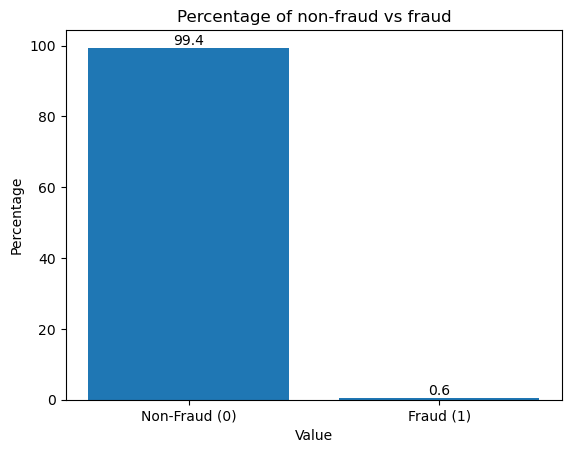

In [10]:
ratio = train["is_fraud"].value_counts() / len(train) * 100
ratio

bar_plot = plt.bar(ratio.index, ratio.values)
plt.xlabel("Value")
plt.ylabel("Percentage")
plt.title("Percentage of non-fraud vs fraud")
plt.xticks(ratio.index, labels=["Non-Fraud (0)", "Fraud (1)"])

# Display the ratio on top of the bars
for bar, value in zip(bar_plot, ratio.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.1f}", ha="center", va="bottom")

plt.show()

From the above graph, it is obvious that there is an imbalance in the target variable with more than 99% of it being non-fraud.

## Check `gender` Distribution

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


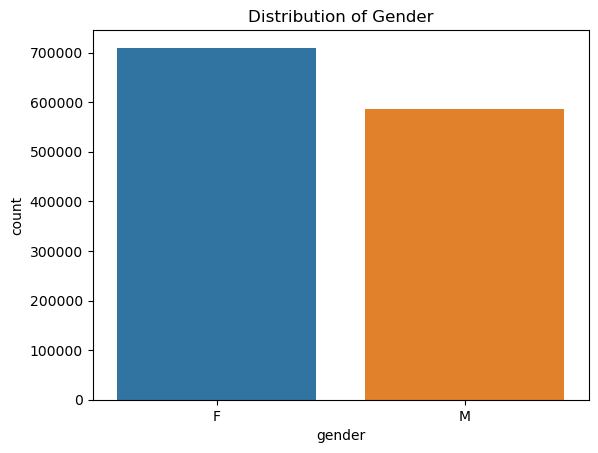

In [11]:
sns.countplot(data=train, x='gender')
plt.title('Distribution of Gender')
plt.show()

## Check `amt` Distribution

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Amount Distribution')]

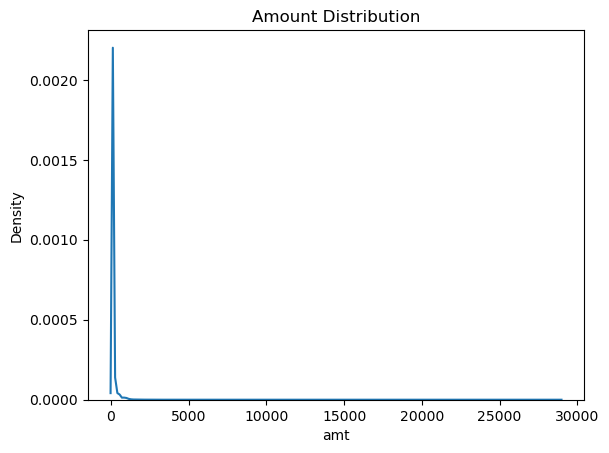

In [12]:
sns.kdeplot(data=train["amt"]).set(title="Amount Distribution")

It seems like there are extreme values (or potential outliers) present in `amt`. The graph below shows the distribution of `amt` for up to the 95<sup>th</sup> percentile.

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Amount Distribution (95th Percentile)')]

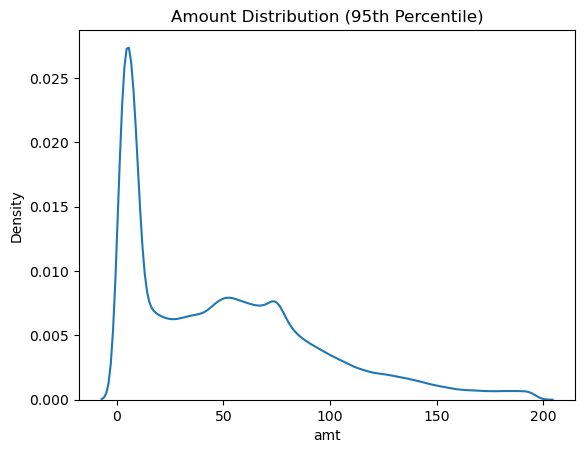

In [13]:
quantile_95 = train["amt"].quantile(0.95)
filtered_data = train[train["amt"] <= quantile_95]["amt"]
sns.kdeplot(filtered_data).set(title="Amount Distribution (95th Percentile)")

# `KIVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV`

In [14]:
duplicates_count = train.duplicated(subset=["cc_num"]).sum()
print(f"total number duplicate users: {duplicates_count:,}")

total number duplicate users: 1,295,692


c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


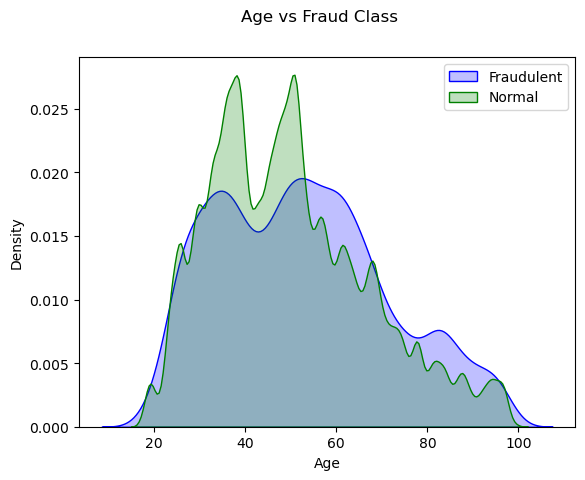

In [15]:
current_year = datetime.now().year
train['dob'] = pd.to_datetime(train['dob'])
train['age'] = current_year - train['dob'].dt.year
test['dob'] = pd.to_datetime(test['dob'])
test['age'] = current_year - test['dob'].dt.year


fig, ax = plt.subplots()

sns.kdeplot(train[train["is_fraud"]==1]["age"], fill=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(train[train["is_fraud"]==0]["age"], fill=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs Fraud Class")
plt.legend()

## Check Distribution of `amt` Against Fraud Class

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


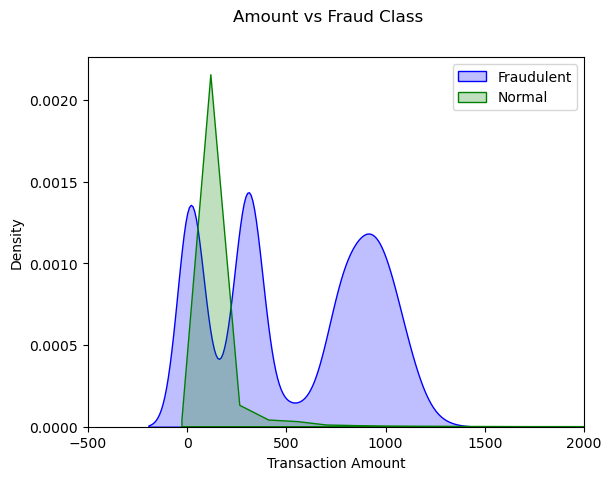

In [16]:
fig, ax = plt.subplots()

sns.kdeplot(train[train["is_fraud"]==1]["amt"], fill=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(train[train["is_fraud"]==0]["amt"], fill=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Transaction Amount")
ax.set_ylabel("Density")

ax.set_xlim(-500,2000)

fig.suptitle("Amount vs Fraud Class")
plt.legend()

Typically, legitimate transactions are approximately $200 or lower, whereas fraudulent transactions often spike near $300 and again between $800 and $1000. This demonstrates a distinct trend.

## Check Top 10 City Corresponding Fraud Cases

In [28]:
cities_fraud = pd.DataFrame(train[train["is_fraud"] == 1].state.value_counts())
cities_non = pd.DataFrame(train[train["is_fraud"] == 0].state.value_counts())
cities = cities_fraud.join(cities_non, lsuffix="_fraud", rsuffix="_non_fraud")
cities.count_non_fraud = cities.count_non_fraud.fillna(0).apply(lambda x: int(x))
cities["fraud_proportion"] = round(cities.count_fraud / (cities.count_fraud + cities.count_non_fraud), 10)
cities = cities.sort_values(by="fraud_proportion", ascending=False)
cities

count_fraud  count_non_fraud  fraud_proportion
state                                                
DE               9                0          1.000000
RI              15              535          0.027273
AK              36             2084          0.016981
NV              47             5560          0.008382
CO             113            13767          0.008141
OR             149            18448          0.008012
TN             140            17414          0.007975
NE             180            23988          0.007448
ME             119            16386          0.007210
NH              59             8219          0.007127
OH             321            46159          0.006906
KS             156            22840          0.006784
VA             198            29052          0.006769
NY             555            82946          0.006647
SC             193            28997          0.006612
FL             281            42390          0.006585
MN             207            31507          0.006527
VT              72            11696          0.006118
SD              74            12250          0.006005
MD             157            26036          0.005994
DC              21             3592          0.005812
CA             326            56034          0.005784
PA             458            79389          0.005736
IL             248            43004          0.005734
UT              61            10638          0.005701
WY             110            19212          0.005693
WV             146            25545          0.005683
GA             146            25917          0.005602
MA              69            12307          0.005575
WI             163            29205          0.005550
KY             155            28320          0.005443
MS             115            21073          0.005428
OK             143            26528          0.005362
IA             142            26843          0.005262
AL             215            40774          0.005245
AR             161            30966          0.005172
MI             238            45916          0.005157
IN             142            27438          0.005149
WA              96            18828          0.005073
TX             479            94397          0.005049
NM              82            16325          0.004998
MO             191            38212          0.004974
NC             149            30117          0.004923
NJ             118            24485          0.004796
LA              91            20874          0.004341
ND              57            14729          0.003855
AZ              37            10733          0.003435
HI               7             2552          0.002735
MT              32            11722          0.002722
CT              16             7686          0.002077
ID              11             5534          0.001984

In [29]:
cities.reset_index().head(10)

state  count_fraud  count_non_fraud  fraud_proportion
0    DE            9                0          1.000000
1    RI           15              535          0.027273
2    AK           36             2084          0.016981
3    NV           47             5560          0.008382
4    CO          113            13767          0.008141
5    OR          149            18448          0.008012
6    TN          140            17414          0.007975
7    NE          180            23988          0.007448
8    ME          119            16386          0.007210
9    NH           59             8219          0.007127

Text(0.5, 1.0, 'Top 10 States by Fraud Proportion')

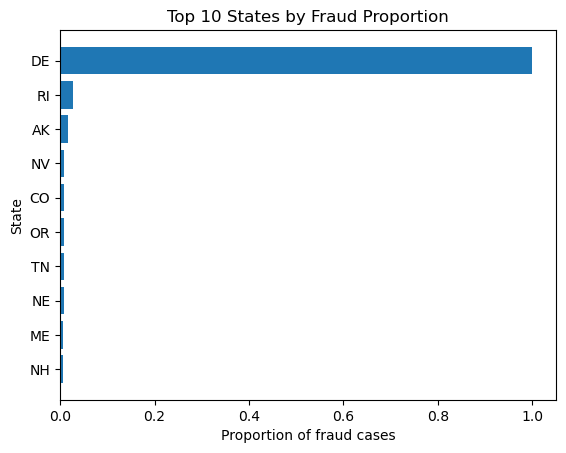

In [30]:
# Filter only top 10 based on fraud proportion
cities_filtered = cities.head(10).reset_index().sort_values(by="fraud_proportion", ascending=True)
plt.barh(cities_filtered.state, cities_filtered.fraud_proportion)
plt.xlabel("Proportion of fraud cases")
plt.ylabel("State")
plt.title("Top 10 States by Fraud Proportion")

The above graph shows the top 10 states based on fraud proportion. Interestingly, state DE (Delaware) has 9 transactions that occurred and all of them were fraudulent.

## Check Location Of Merchants Where Fraudulent Transactions Occurred

In [32]:
map = fo.Map(location=[45.50, -100.75], zoom_start=5)
map

In [33]:
filtered_geo_data = train[train["is_fraud"] == 1]
points = filtered_geo_data[["merch_lat", "merch_long"]].apply(tuple, axis=1)
for point in points:
    fo.CircleMarker(location=[point[0], point[1]], fill_color="red", fill=True, radius=5).add_to(map)
map

The graph above shows the distribution of fraudulent transactions in the United States. It seems that there are more fraudulent transactions in the eastern side of the United States than central and western United States.

## Quantile Analysis

In [34]:
quantile = train[numerical_variables].describe().loc[['min', '25%', '50%', '75%', 'max']].transpose()
quantile.columns = ['min', 'Q1', 'Q2', 'Q3', 'max']
quantile['range'] = quantile['max'] - quantile['min']
quantile['IQR'] = quantile['Q3'] - quantile['Q1']
quantile.drop(["cc_num", "zip", "lat", "long", "unix_time", "merch_lat", "merch_long"], axis=0)

min      Q1       Q2        Q3        max      range       IQR
amt        1.0    9.65    47.52     83.14    28948.9    28947.9     73.49
city_pop  23.0  743.00  2456.00  20328.00  2906700.0  2906677.0  19585.00
is_fraud   0.0    0.00     0.00      0.00        1.0        1.0      0.00

In [35]:
descriptive_stats = train[numerical_variables].describe().loc[['mean', 'std', '50%']].transpose()
descriptive_stats.columns = ['mean', 'std', 'median']
descriptive_stats['mode'] = train[numerical_variables].mode().transpose()[0]
descriptive_stats['mad'] = [stats.median_abs_deviation(train[x]) for x in numerical_variables]
descriptive_stats['kurtosis'] = [stats.kurtosis(train[x]) for x in numerical_variables]
descriptive_stats['skewness'] = [stats.skew(train[x]) for x in numerical_variables]
descriptive_stats.drop(["cc_num", "zip", "lat", "long", "unix_time", "merch_lat", "merch_long"], axis=0)

mean            std   median    mode     mad     kurtosis  \
amt          70.351035     160.316039    47.52    1.14    37.5  4545.627447   
city_pop  88824.440563  301956.360689  2456.00  606.00  2198.0    37.614370   
is_fraud      0.005789       0.075863     0.00    0.00     0.0   167.757621   

           skewness  
amt       42.277825  
city_pop   5.593847  
is_fraud  13.029107

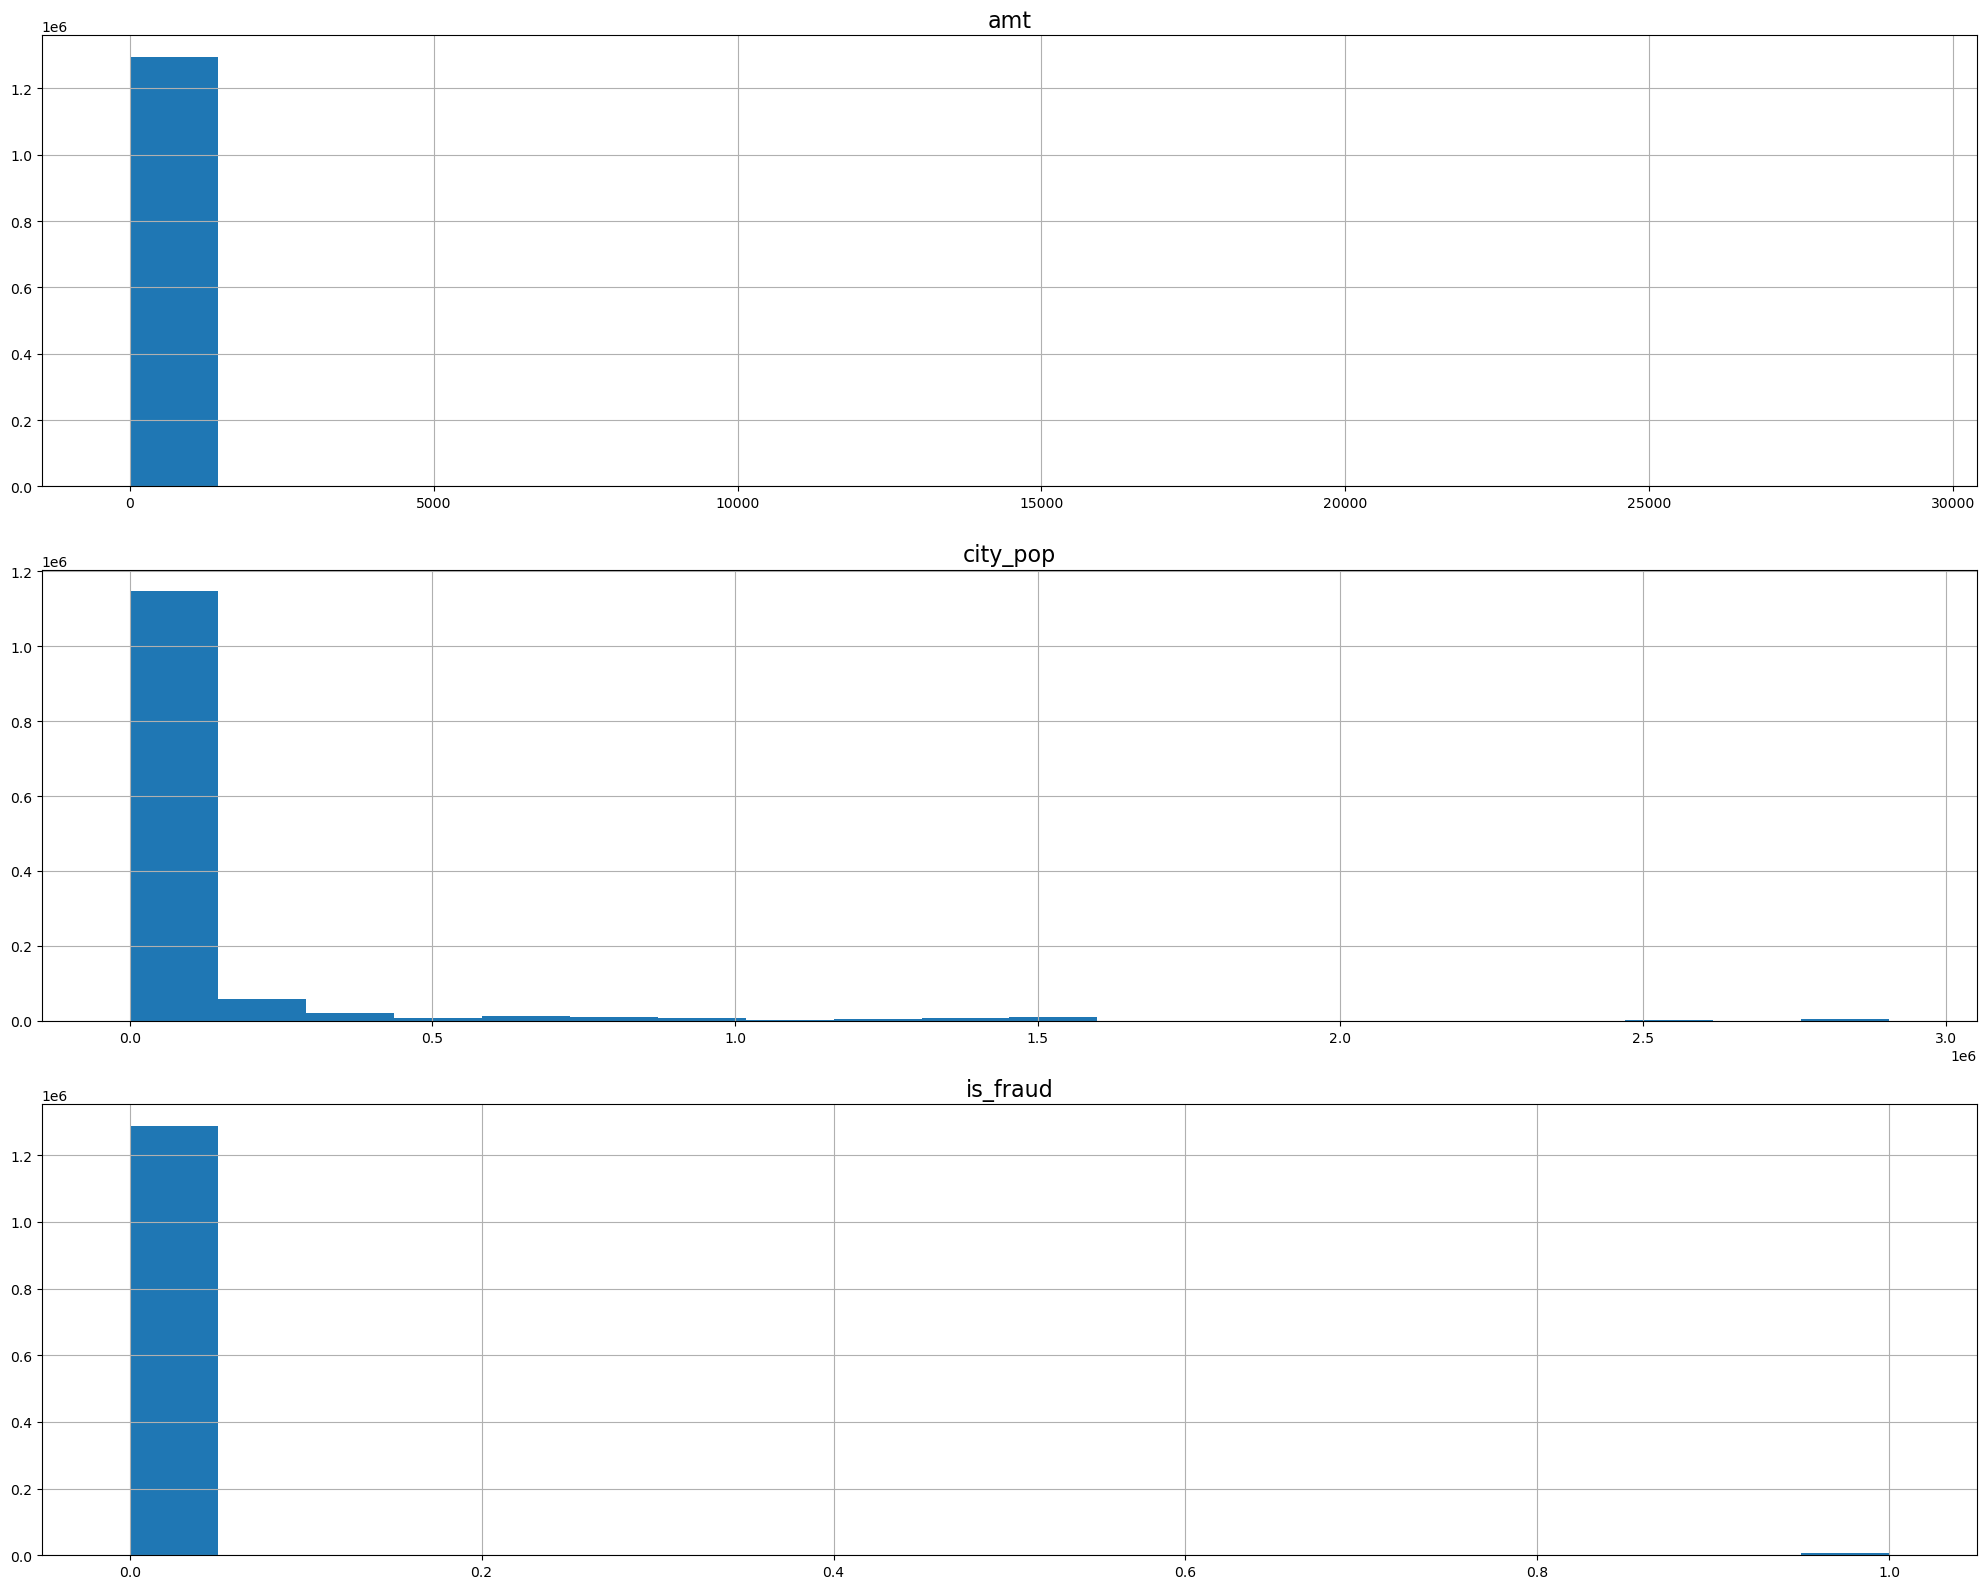

In [36]:
fig, axs = plt.subplots(3, 1, figsize=(20, 16))

axes = ["amt", "city_pop", "is_fraud"]

for index, name in enumerate(train[axes].columns):
    if index < 3:
        axes[index] = axs[index]
        train[name].hist(ax=axes[index], bins=20)
        axes[index].set_title(name, fontsize=16)

plt.tight_layout()
plt.show()

## Check `category` Distribution

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Number of Transactions Based on Category')

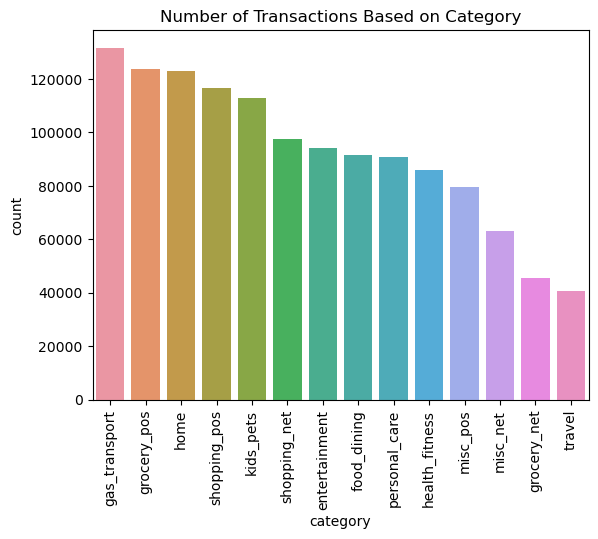

In [37]:
# sort train data by category
ax = sns.countplot(x="category", data=train, order=train.category.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Number of Transactions Based on Category")

From the above graph, the top 5 categories based on number of transactions are gas_transport, grocery_pos, home, shopping_pos and kids_pets.

## Check Proportion of Fraudulent Transactions Per `category`

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

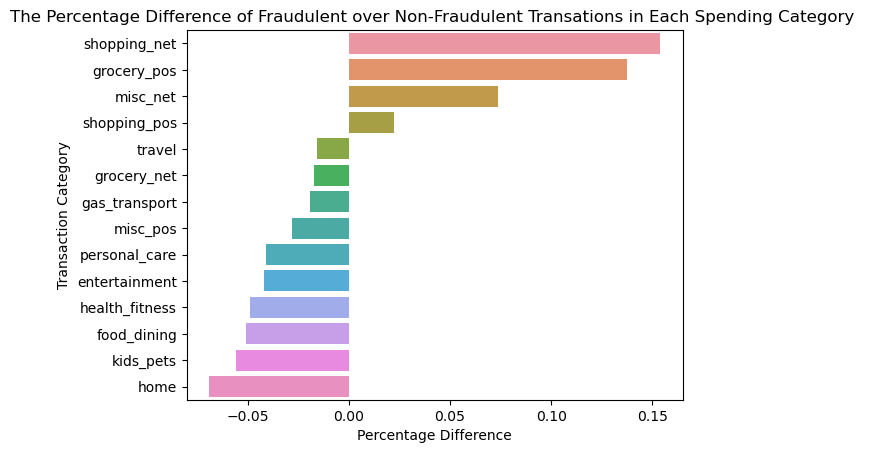

In [39]:
#calculate the percentage difference
a=train[train['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=train[train['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Certain categories of spending are more susceptible to fraud, particularly 'Shopping_net', 'Grocery_pos', and 'misc_net'. Conversely, categories such as 'home' and 'kids_pets' generally experience higher volumes of legitimate transactions compared to fraudulent activity.

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-package

Text(0.5, 1.0, 'Non-Fraudulent Transactions')

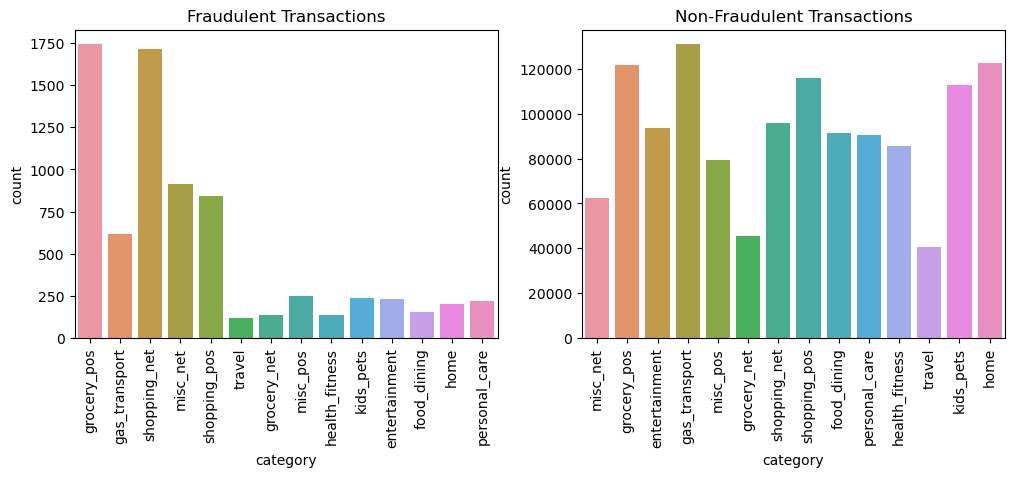

In [42]:
# sort fraudulent and non-fraudulent train data by category
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

train_fraudulent = train[train["is_fraud"] == 1]
train_non_fraudulent = train[train["is_fraud"] == 0]

ax_fraudulent = sns.countplot(x="category", data=train_fraudulent, ax=axes[0])
ax_fraudulent.set_xticklabels(ax_fraudulent.get_xticklabels(), rotation=90)
axes[0].set_title("Fraudulent Transactions")

ax_non_fraudulent = sns.countplot(x="category", data=train_non_fraudulent, ax=axes[1])
ax_non_fraudulent.set_xticklabels(ax_non_fraudulent.get_xticklabels(), rotation=90)
axes[1].set_title("Non-Fraudulent Transactions")

#ax_non_fraudulent_without_outliers = sns.countplot(x="category", data=train_non_fraudulent_without_outliers, ax=axes[2])
#ax_non_fraudulent_without_outliers.set_xticklabels(ax.get_xticklabels(), rotation=90) 



From the above countplots we can see that among fraudulent transactions, gas_transport and travel have much higher occurrences compared to the other categories.

In [36]:
# One-hot encode 'category' and keep the original column
category_dummies_train = pd.get_dummies(train['category'], prefix='category', dtype=int)
train = pd.concat([train, category_dummies_train], axis=1)

category_dummies_test = pd.get_dummies(test['category'], prefix='category', dtype=int)
test = pd.concat([test, category_dummies_test], axis=1)

# Assuming 'transaction_day_of_week' is a column derived from 'transaction_dt' indicating the day of the week
day_of_week_dummies_train = pd.get_dummies(train['transaction_day_of_week'], dtype=int)
train = pd.concat([train, day_of_week_dummies_train], axis=1)

day_of_week_dummies_test = pd.get_dummies(test['transaction_day_of_week'], dtype=int)
test = pd.concat([test, day_of_week_dummies_test], axis=1)


c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

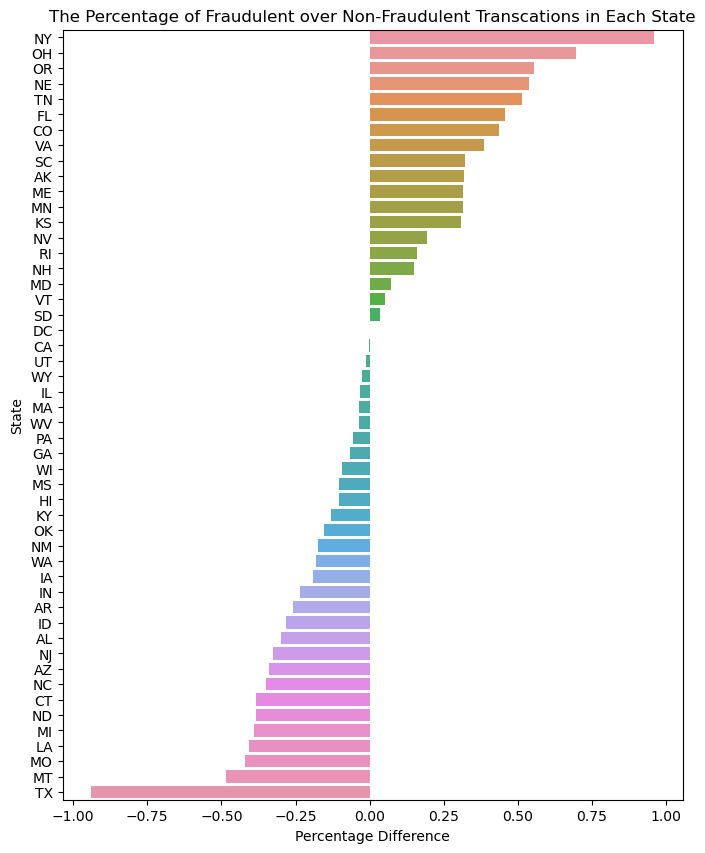

In [43]:
a=train['state'][train.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=train['state'][train.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

plt.figure(figsize=(8, 10))
ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

It's observable that states like NY and OH, among others, exhibit a higher proportion of fraudulent transactions as opposed to legitimate ones, in contrast to states like TX and MT, which show the reverse trend. Nonetheless, it's worth noting that the percentage variances in these states are relatively modest, indicating a correlation, albeit not a strong one.

In [29]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 456136 to 305711
Data columns (total 47 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trans_date_trans_time    1296675 non-null  object        
 1   cc_num                   1296675 non-null  int64         
 2   merchant                 1296675 non-null  object        
 3   category                 1296675 non-null  object        
 4   amt                      1296675 non-null  float64       
 5   first                    1296675 non-null  object        
 6   last                     1296675 non-null  object        
 7   gender                   1296675 non-null  object        
 8   street                   1296675 non-null  object        
 9   city                     1296675 non-null  object        
 10  state                    1296675 non-null  object        
 11  zip                      1296675 non-null  int64         
 12  l

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-package

Text(0.5, 1.0, 'Non-Fraudulent Transactions')

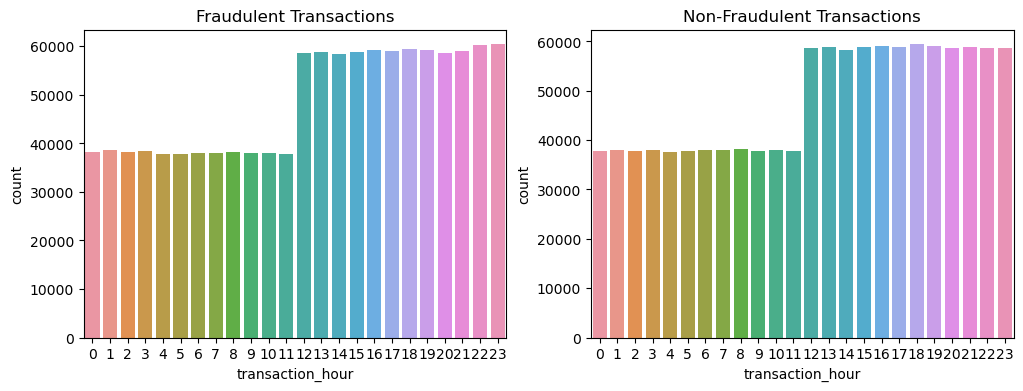

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax_fraudulent = sns.countplot(x="transaction_hour", data=train, ax=axes[0])
axes[0].set_title("Fraudulent Transactions")

ax_non_fraudulent = sns.countplot(x="transaction_hour", data=train_non_fraudulent, ax=axes[1])
axes[1].set_title("Non-Fraudulent Transactions")

 Fraudulent transactions happen around midnight when most people are asleep

c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Anaconda\lib\site-package

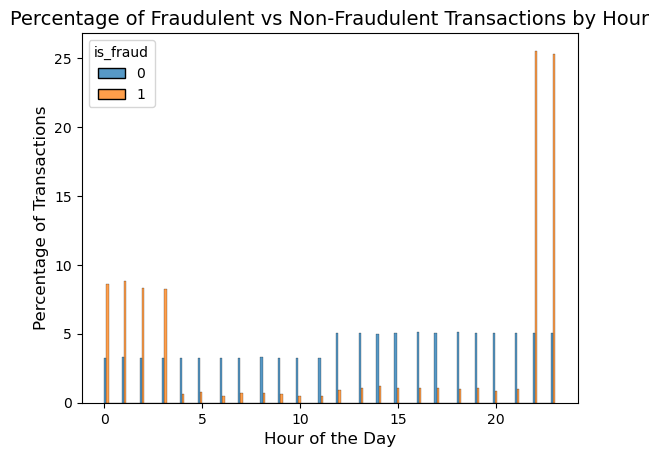

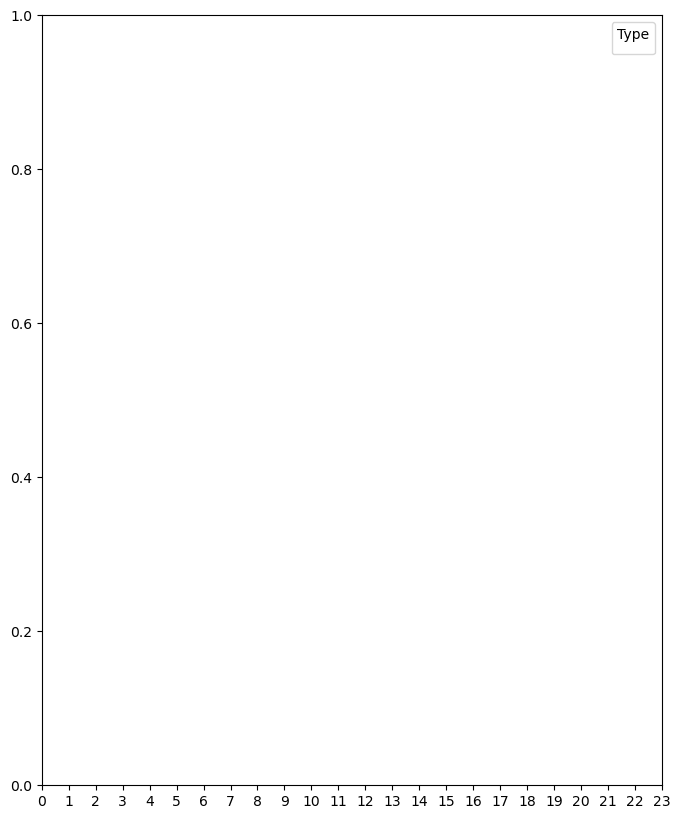

In [40]:
ax=sns.histplot(data=train, x="transaction_hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage of Transactions', fontsize=12)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_title('Percentage of Fraudulent vs Non-Fraudulent Transactions by Hour', fontsize=14)

plt.figure(figsize=(8, 10))
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
# plt.show()

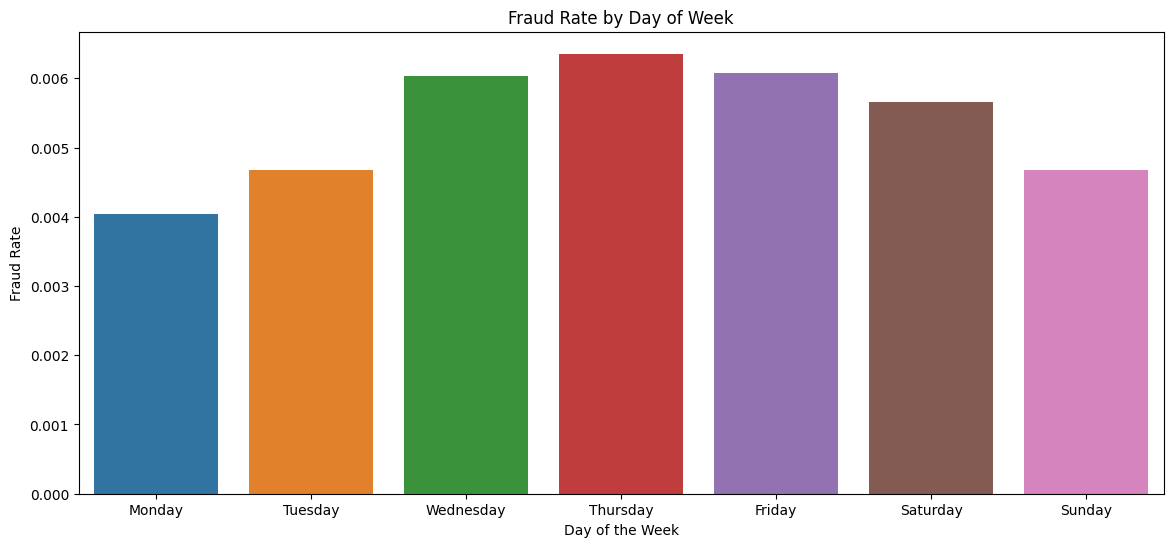

In [50]:
# Calculate the fraud rate
fraud_rate = (train[train['is_fraud'] == 1].groupby('transaction_day_of_week').size() / 
              train.groupby('transaction_day_of_week').size())

# Convert to DataFrame for plotting
fraud_rate = fraud_rate.reset_index(name='fraud_rate')

# Plot the fraud rates by day of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(14, 6))
sns.barplot(x='transaction_day_of_week', y='fraud_rate', data=fraud_rate, order=days_order)
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fraud Rate')
plt.show()


Some conclusions that can be drawn:
- Fraudulent transactions are usually higher amounted (probably the most useful)
- Fraudulent transactions are more likely to be done between 2200-0400H
- Fraudulent transactions are more likely to be under transportation merchants or travel merchants
- 

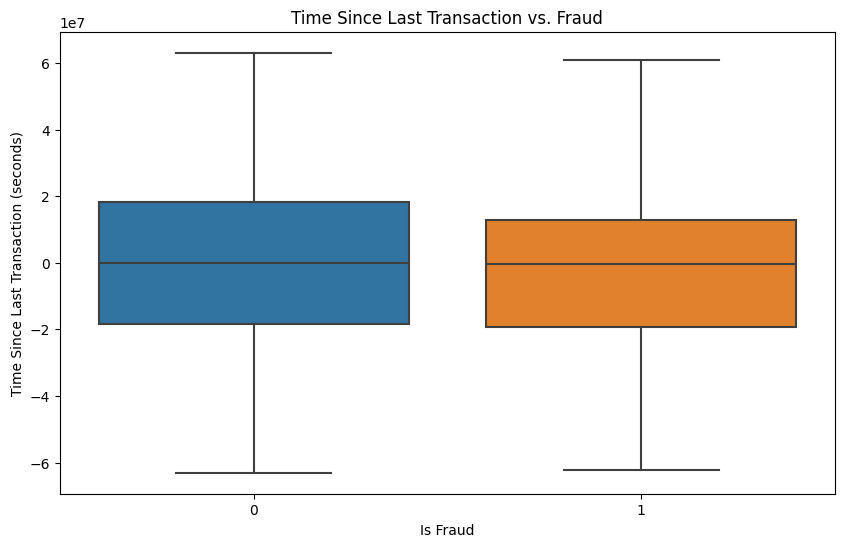

In [38]:
# Transaction Velocity Analysis
train['time_since_last_transaction'] = train.groupby('cc_num')['unix_time'].diff()
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='time_since_last_transaction', data=train)
plt.title('Time Since Last Transaction vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Time Since Last Transaction (seconds)')
plt.show()

In [39]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 456136 to 305711
Data columns (total 48 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   trans_date_trans_time        1296675 non-null  object        
 1   cc_num                       1296675 non-null  int64         
 2   merchant                     1296675 non-null  object        
 3   category                     1296675 non-null  object        
 4   amt                          1296675 non-null  float64       
 5   first                        1296675 non-null  object        
 6   last                         1296675 non-null  object        
 7   gender                       1296675 non-null  object        
 8   street                       1296675 non-null  object        
 9   city                         1296675 non-null  object        
 10  state                        1296675 non-null  object        
 11  zip         

# Data Preprocessing

In [ ]:
# code  

# Feature Engineering

### Create new features `transaction_hour`, `transaction_day_of_week` and `transaction_month`

In [ ]:
train["transaction_dt"] = pd.to_datetime(train["trans_date_trans_time"])
test["transaction_dt"] = pd.to_datetime(test["trans_date_trans_time"])

# Extract the hour in which the transaction was made (0=midnight, 23=11p.m.)
train["transaction_hour"] = train["transaction_dt"].dt.hour
test["transaction_hour"] = test["transaction_dt"].dt.hour

# Extract the day of the week in which the transaction was made (Monday=0, Sunday=6)
train['transaction_day_of_week'] = train['transaction_dt'].dt.day_of_week
test['transaction_day_of_week'] = test['transaction_dt'].dt.day_of_week

# Extract the month in which the transaction was made (January=1, December=12)
train['transaction_month'] = train['transaction_dt'].dt.month
test['transaction_month'] = test['transaction_dt'].dt.month

In [ ]:
train

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1050301   2020-03-11 10:50:13  4469777115158234880   
1050302   2020-03-11 10:52:40         676245600876   
1050303   2020-03-11 10:57:32     3517814635263522   
1050304   2020-03-11 10:57:47      343746486082492   
1050305   2020-03-11 10:58:53     3534330126107879   

                                   merchant       category     amt      first  \
0                fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1           fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                      fraud_Lind-Buckridge  entertainment  220.11     Edward   
3        fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                       fraud_Keeling-Crist       misc_pos   41.96      Tyler   
...                                     ...            ...     ...        ...   
1050301                    fraud_Barton Inc    grocery_pos   86.15    Gregory   
1050302                  fraud_Miller-Hauck    grocery_pos   97.30     Ashley   
1050303              fraud_Dickinson-Rempel       misc_pos    3.15    William   
1050304                 fraud_Miller-Harris       misc_net    5.65    Jeffrey   
1050305                 fraud_Gutmann-Upton       misc_pos   28.66    Jeffrey   

              last gender                           street             city  \
0            Banks      F                   561 Perry Cove   Moravian Falls   
1             Gill      F     43039 Riley Greens Suite 393           Orient   
2          Sanchez      M         594 White Dale Suite 530       Malad City   
3            White      M      9443 Cynthia Court Apt. 038          Boulder   
4           Garcia      M                 408 Bradley Rest         Doe Hill   
...            ...    ...                              ...              ...   
1050301     Graham      M                  4005 Dana Glens          Methuen   
1050302  Blanchard      F           292 Lowe Dam Suite 858  West Palm Beach   
1050303     Cannon      M  43809 Kenneth Circles Suite 152            Union   
1050304      Munoz      M              836 Stephanie Union            Cedar   
1050305      Smith      M          713 Scott Pike Apt. 712          Bridger   

         ...         dob                         trans_num   unix_time  \
0        ...  1988-03-09  0b242abb623afc578575680df30655b9  1325376018   
1        ...  1978-06-21  1f76529f8574734946361c461b024d99  1325376044   
2        ...  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051   
3        ...  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076   
4        ...  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186   
...      ...         ...                               ...         ...   
1050301  ...  1980-11-22  1f38abb37343d6df42307a474ffb0900  1362999013   
1050302  ...  1960-06-14  9f12e46d28062974828eb4218d46e78e  1362999160   
1050303  ...  1941-10-16  5e1833e5b56a3a0fcd2da5bc7ff6d00d  1362999452   
1050304  ...  1975-10-11  9f792cda5a7f4d01ccefb799d1e2f98c  1362999467   
1050305  ...  1978-01-15  ff5720255e1b99fc2734f818c156cb92  1362999533   

         merch_lat  merch_long is_fraud      transaction_dt transaction_hour  \
0        36.011293  -82.048315        0 2019-01-01 00:00:18                0   
1        49.159047 -118.186462        0 2019-01-01 00:00:44                0   
2        43.150704 -112.154481        0 2019-01-01 00:00:51                0   
3        47.034331 -112.561071        0 2019-01-01 00:01:16                0   
4        38.674999  -78.632459        0 2019-01-01 00:03:06                0   
...            ...         ...      ...                 ...         

## Further split training set into training set (90%) and validation set (10%)

In [ ]:
validation = train[len(train) - round(len(train)*0.1):]
train = train[:len(train) - round(len(train)*0.1)]

In [ ]:
print(f"Number of fraud cases in train set: {len(train[train['is_fraud'] == 1]):,}")
print(f"Number of total records in train set: {len(train):,}")
print(f"Proportion of fraud cases in train set: {round(len(train[train['is_fraud'] == 1]) / len(train), 4)}\n")

print(f"Number of fraud cases in train set: {len(validation[validation['is_fraud'] == 1]):,}")
print(f"Number of total records in train set: {len(validation):,}")
print(f"Proportion of fraud cases in train set: {round(len(validation[validation['is_fraud'] == 1]) / len(validation), 4)}\n")

print(f"Number of fraud cases in train set: {len(test[test['is_fraud'] == 1]):,}")
print(f"Number of total records in train set: {len(test):,}")
print(f"Proportion of fraud cases in train set: {round(len(test[test['is_fraud'] == 1]) / len(test), 4)}")

Number of fraud cases in train set: 6,020
Number of total records in train set: 1,050,306
Proportion of fraud cases in train set: 0.0057

Number of fraud cases in train set: 654
Number of total records in train set: 116,701
Proportion of fraud cases in train set: 0.0056

Number of fraud cases in train set: 2,145
Number of total records in train set: 555,719
Proportion of fraud cases in train set: 0.0039


# Oversampling

In [ ]:
# code

# Predictive Models

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the columns to drop
all_columns_to_drop = [
    'trans_date_trans_time', 'cc_num', 'first', 'last', 'street',
    'merchant', 'city', 'job', 'dob', 'transaction_dt', 'lat', 'long',
    'merch_lat', 'merch_long', 'zip', 'category', 'transaction_day_of_week', 
    'gender', 'state', 'trans_num'
]

# Drop the columns from the training set
X_train_log = train.drop(columns=all_columns_to_drop, axis=1, errors='ignore')
y_train_log = train['is_fraud']

# Drop the columns from the test set
X_test_log = test.drop(columns=all_columns_to_drop, axis=1, errors='ignore')
y_test_log = test['is_fraud']

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model on the training data
log_reg.fit(X_train_log, y_train_log)

# Predict on the test set
y_pred_log = log_reg.predict(X_test_log)

# Evaluate the model's performance
print(classification_report(y_test_log, y_pred_log))
# print('accuracy:', metrics.accuracy_score(y_test_log, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92    553574
           1       0.00      0.10      0.01      2145

    accuracy                           0.86    555719
   macro avg       0.50      0.48      0.47    555719
weighted avg       0.99      0.86      0.92    555719



Didnt predict any frauds LOL

In [35]:
print(X_train_log.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 456136 to 305711
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   city_pop                 1296675 non-null  int64  
 2   unix_time                1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   transaction_hour         1296675 non-null  int32  
 5   age                      1296675 non-null  int32  
 6   category_entertainment   1296675 non-null  int32  
 7   category_food_dining     1296675 non-null  int32  
 8   category_gas_transport   1296675 non-null  int32  
 9   category_grocery_net     1296675 non-null  int32  
 10  category_grocery_pos     1296675 non-null  int32  
 11  category_health_fitness  1296675 non-null  int32  
 12  category_home            1296675 non-null  int32  
 13  category_kids_pets       1296675 non-null  

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define the columns to drop
all_columns_to_drop = [
    'trans_date_trans_time', 'cc_num', 'first', 'last', 'street',
    'merchant', 'city', 'job', 'dob', 'transaction_dt', 'lat', 'long',
    'merch_lat', 'merch_long', 'zip', 'category', 'transaction_day_of_week', 
    'gender', 'state', 'trans_num'
]

# Drop the columns from the training set
X_train_tree = train.drop(columns=all_columns_to_drop + ['is_fraud'], axis=1, errors='ignore')
y_train_tree = train['is_fraud']

# Drop the columns from the test set
X_test_tree = test.drop(columns=all_columns_to_drop + ['is_fraud'], axis=1, errors='ignore')
y_test_tree = test['is_fraud']

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Fit the model on the training data
decision_tree.fit(X_train_tree, y_train_tree)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test_tree)

# Evaluate the model's performance
print(classification_report(y_test_tree, y_pred_tree))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184279
           1       0.80      0.80      0.80       960

    accuracy                           1.00    185239
   macro avg       0.90      0.90      0.90    185239
weighted avg       1.00      1.00      1.00    185239



In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model on the training data
random_forest.fit(X_train_tree, y_train_tree)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_tree)

# Evaluate the model's performance
print(classification_report(y_test_tree, y_pred_rf))


KeyboardInterrupt: 

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for Random Forest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
#                            param_grid=param_grid, 
#                            cv=3, 
#                            n_jobs=-1, 
#                            verbose=2,
#                            scoring='roc_auc')

# # Fit the grid search to the data
# grid_search.fit(X_train_tree, y_train_tree)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Train the model with the best parameters
# best_random_forest = RandomForestClassifier(**best_params, random_state=42)
# best_random_forest.fit(X_train_tree, y_train_tree)

# # Predict on the test set
# y_pred_best_rf = best_random_forest.predict(X_test_tree)

# # Evaluate the best model's performance
# print(classification_report(y_test_tree, y_pred_best_rf))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
gradient_boosting.fit(X_train_tree, y_train_tree)

# Predict on the test set
y_pred_gb = gradient_boosting.predict(X_test_tree)

# Evaluate the model's performance
print(classification_report(y_test_tree, y_pred_gb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184279
           1       0.84      0.69      0.76       960

    accuracy                           1.00    185239
   macro avg       0.92      0.85      0.88    185239
weighted avg       1.00      1.00      1.00    185239

